In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile,QuantumRegister,ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum-computing.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

**Schrödinger's Cat**

Copenhagen Interpretation-observation causes collapse
Everettian Quantum Mechanics uses a no Collapse Approach,and it leads to 2 emergent branches of Universe. Here one where we see a dead cat and the other where we see an alive cat. This is the Many-Worlds Interpretation.


No Collapse situation

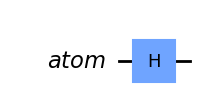

In [2]:
qr=QuantumRegister(1,name="atom")
qc=QuantumCircuit(qr)
qc.h(qr[0])#applying Hadamard Gate(creates superposition)
qc.draw("mpl")

In [3]:
qc.measure_all()
from qiskit_aer import AerSimulator
backend=AerSimulator(shots=1024)
result=backend.run(qc).result()
print(result.get_counts())# we would get almost same number of counts for both. If we were to increase the number of shots in AerSimulator we would converge to 50-50%

{'0': 515, '1': 509}


In [4]:
# we will use a CNOT gate to rep cat interacting eith the radioactive atom above
qr_cat=QuantumRegister(1,name="Cat")
qc=QuantumCircuit(qr,qr_cat)
qc.h(qr[0])
qc.cx(qr[0],qr_cat[0])#Here first one is the control qubit. Is its zero=>Not decayed=>cat alive

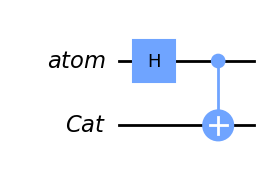

In [5]:
qc.draw('mpl')

In [6]:
qc.measure_all()

backend=AerSimulator(shots=1024)
result=backend.run(qc).result()
print(result.get_counts())# as we can see our cat is entangled with the atom.(as we only get op as 00 or 11) They are now a Quantum System

{'00': 528, '11': 496}


In [10]:
meas=ClassicalRegister(2)
qr_cat=QuantumRegister(1,name="Cat")
qc=QuantumCircuit(qr,qr_cat,meas)
qc.h(qr[0])
qc.cx(qr[0],qr_cat[0])
qc.measure(qr,meas[0])#measure atom in classical bit 0
qc.measure(qr_cat,meas[1])#measuring cat in classical bit 1

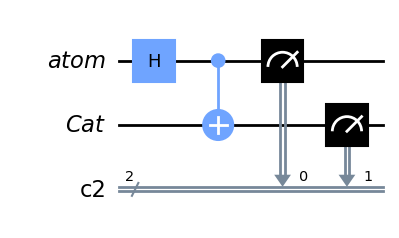

In [11]:
qc.draw('mpl')

In [12]:

result=backend.run(qc,shots=1).result()#running for just one observation of us looking into box to check if the cat is alive or dead
print(result.get_counts())

{'00': 1}


But we can model ourselves into this Quantum Sysytem as well

In [15]:
meas=ClassicalRegister(3)
qr_observe=QuantumRegister(1,name="observer")
qc=QuantumCircuit(qr,qr_cat,qr_observe,meas)
qc.h(qr[0])
qc.cx(qr[0],qr_cat[0])
qc.cx(qr_cat[0],qr_observe[0])#Now we are entangling ourselves with the cat
qc.measure(qr,meas[0])#measure atom in classical bit 0
qc.measure(qr_cat,meas[1])
qc.measure(qr_observe,meas[2])#measuring observation result in classical bit 2

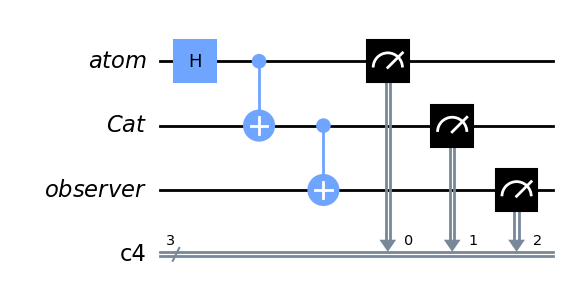

In [16]:
qc.draw('mpl')

Representing how every qubit becomes entangled using something like a domino effect

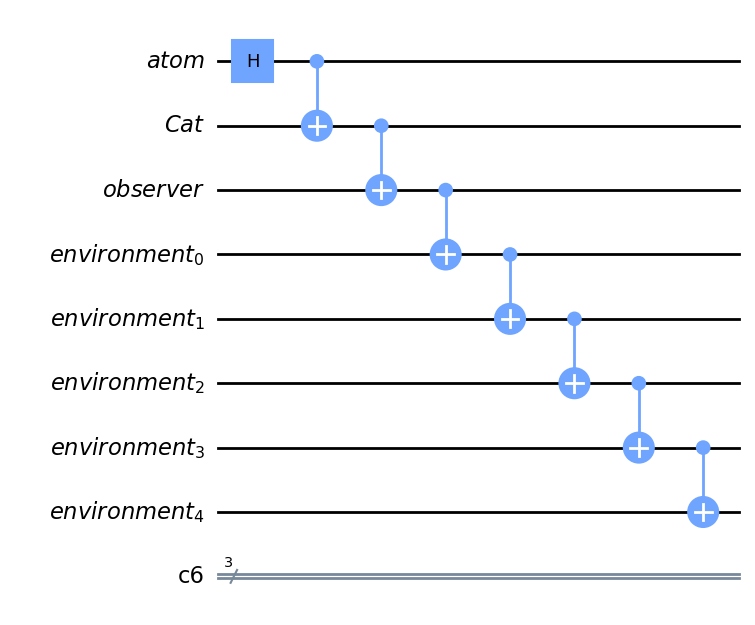

In [18]:
meas=ClassicalRegister(3)
qr_env=QuantumRegister(5,name="environment")
qc=QuantumCircuit(qr,qr_cat,qr_observe,qr_env,meas)
qc.h(qr[0])
qc.cx(qr[0],qr_cat[0])
qc.cx(qr_cat[0],qr_observe[0])
qc.cx(qr_observe[0],qr_env[0])
for i in range(0,4):
    qc.cx(qr_env[i],qr_env[i+1])
#qc.measure(qr,meas[0])
#qc.measure(qr_cat,meas[1])
#qc.measure(qr_observe,meas[2])
qc.draw('mpl')
# Now as we can see all qubits are entangled theya re either all zero or all one. Therefore everyone will se the same result.

So, in accordance with Everttian theory observer is in a branch of universe of either all 1s or all 0s i.e. everyone in the universe will notice only one posiibilty. Either cat is dead or it is alive.

This is Quantum Dechoherence where on interacting with the environment the quantum system loses its quantum properties.

Is we were to measure the sates now, we would again get roughly 50-50% distribution in states 0 and 1. This is the principle of deferred measurement. It states that the counts before and after controls is equal.